HeapSort: not in place de complexicade n log(n)

In [39]:
#Adaptado de: https://www.programiz.com/dsa/heap-sort
def Heap(A, n, i):
  no_maior = i
  left = 2*i + 1
  right = 2*i + 2

  if left < n and A[i] < A[left]:
    no_maior = left
  
  if right < n and A[no_maior] < A[right]:
    no_maior = right
  
  if no_maior != i:
    A[i], A[no_maior] = A[no_maior], A[i]
    Heap(A, n, no_maior)

def HeapSort_NotInPlace1(A):
  n = len(A)
  Q = A

  for i in range(n//2, -1, -1):
    Heap(Q, n, i)

  for i in range(n-1, 0, -1):
    Q[i], Q[0] = Q[0], Q[i]
    Heap(Q, i, 0)

  return Q

import heapq as heap

def HeapSort_NotInPlace(A):
  if len(A) > 1:
    Q = []
    for e in A:
      heap.heappush(Q,e)
    for i in range(len(A)):
      A[i] = heap.heappop(Q)
    return A



In [38]:
A = [4,3,7,5,9,8,7,0,0,2,2,9]
print(HeapSort_NotInPlace1(A))

A = [4,3,7,5,9,8,7,0,0,2,2,9]
print(HeapSort_NotInPlace(A))


[0, 0, 2, 2, 3, 4, 5, 7, 7, 8, 9, 9]
[0, 0, 2, 2, 3, 4, 5, 7, 7, 8, 9, 9]
[0, 0, 7, 3, 2, 8, 7, 4, 5, 2, 9, 9]


HeapSort: in place

In [40]:
#retorna a posição do filho com maior valor 
#Vetor A, 'e' é o filho da esquerda e 'd' o da direita
def Max2(A,e,d):
  print(A[d])
  max = A[e]
  if (A[d] > max):
    max = A[d]
    return d
  return e

#Adaptado
def Max(A, n, s, e, d):
  max = n
  if (e < s and A[n] < A[e]):
    max = e
  if (d < s and A[max] < A[d]):
    max = d
  return max

def MaxHeapifyRec(A,n,s):
  c = Max(A, n, s, n*2 + 2, n*2 + 1)
  if (c < s and A[n] < A[c]):
    A[n], A[c] = A[c], A[n]
    MaxHeapify(A, c, s)

def MaxHeapify(A,n,s):
  c = Max(A, n, s, n*2 + 2, n*2 + 1)
  while (c < s and A[n] < A[c]):
    A[n], A[c] = A[c], A[n]
    n = c
    c = Max(A, n, s, n*2 + 2, n*2 + 1)

def BuildMaxHeap(A,s):
  for n in range((s-1)//2, -1, -1):
    MaxHeapify(A,n,s)

def HeapSort_InPlace(A):                                                                                                                                                        
  BuildMaxHeap(A, len(A))
  for s in range(len(A) -1, 0, -1):
    A[0], A[s] = A[s], A[0]
    MaxHeapify(A, 0, s)
  return A

In [ ]:
A = [4,3,7,5,9,8,7,8,5,4,1,3,7,8,8,4,10,1,10,10,10,10,0]
print(HeapSort_InPlace(A))


[0, 1, 1, 3, 3, 4, 4, 4, 5, 5, 7, 7, 7, 8, 8, 8, 8, 9, 10, 10, 10, 10, 10]


BucketSort

In [41]:
def BucketSortAdaptado(A):
  bucket = []

  for i in range(len(A)):
    bucket.append([])

  for j in A:
    bucket[j].append(j)
  
  print(bucket)
  
  index = 0
  for i in range(len(A)):
    for j in range(len(bucket[i])):
      A[index] = bucket[i][j]
      index = index + 1
  
  return A

def BucketSort(A):
  dominio = max(A) + 1
  bucket = ['']*dominio 
  
  for i in A:
    if bucket[i] == '':
      bucket[i] = 1
    else:
      bucket[i] = bucket[i] + 1
  
  A = []
  for i in range(len(bucket)):
    if bucket[i] != '':
      size = bucket[i]
      while size > 0:
        A.append(i)
        size = size - 1
  return A


In [ ]:
A = [4,3,7,5,9,8,7,8,5,4,1,3,7,8,8,4,10,1,10,10,10,10,0]

print("Resultado final", BucketSort(A))
#BucketSortAdaptado(A)


Bucket:  [1, 2, '', 2, 3, 2, '', 3, 4, 1, 5]
Resultado final [0, 1, 1, 3, 3, 4, 4, 4, 5, 5, 7, 7, 7, 8, 8, 8, 8, 9, 10, 10, 10, 10, 10]


MergeSort e o QuickSort In Place

In [42]:
def Merge(D,L,R):
  li = 0
  ri = 0
  i = 0
  for i in range(len(D)):
    if li >= len(L):
      D[i] = R[ri]
      ri = ri + 1
    elif ri >= len(R):
      D[i] = L[li]
      li = li + 1
    else:
      if L[li] < R[ri]:
        D[i] = L[li]
        li = li + 1
      else:
        D[i] = R[ri]
        ri = ri + 1    

def MergeSort(A):
  if len(A) > 1:
    L = A[0: int(len(A)//2)]
    R = A[int(len(A)//2):len(A)]
    MergeSort(L)
    MergeSort(R)
    Merge(A,L,R)
  return A

def HoarePartition(A,i,j):
  l = i
  p = j
  r = j - 1
  while l <= r:
    while l <= r and A[l] < A[p]:
      l = l + 1
    while l <= r and A[r] > A[p]:
      r = r - 1
    if (l<=r):
      A[l], A[r] = A[r],A[l]
      l = l + 1
      r = r - 1
  A[l], A[p] = A[p],A[l]
  return l

def ChamadaHoare(A,l,j):
  if l < j:
    m = HoarePartition(A,l,j)
    ChamadaHoare(A,l,m-1)
    ChamadaHoare(A,m+1,j)
  return A

def QuickSort(A):
   i = 0
   j = len(A) - 1
   A = ChamadaHoare(A,i,j)
   return A


In [ ]:
dataList = [10,1,2,4,3,9]
A = dataList.copy()

print(MergeSort(A),sorted(dataList))
print(QuickSort(A),sorted(dataList))
print(HeapSort_NotInPlace(A),sorted(dataList))
print(HeapSort_InPlace(A),sorted(dataList))
print(BucketSort(A),sorted(dataList))

[1, 2, 3, 4, 9, 10] [1, 2, 3, 4, 9, 10]
[1, 2, 3, 4, 9, 10] [1, 2, 3, 4, 9, 10]
[1, 2, 3, 4, 9, 10] [1, 2, 3, 4, 9, 10]
[1, 2, 3, 4, 9, 10] [1, 2, 3, 4, 9, 10]
[1, 2, 3, 4, 9, 10] [1, 2, 3, 4, 9, 10]


In [50]:
import time
from numpy import random
DOMAIN = 1000 #quanto menor melhor o BucketSort
def avg_time(domain, tam, func, rounds, debug = False):
  sum = float(0)
  for i in range(rounds):
    random.seed(i)
    dataList=list(random.randint(domain, size=tam))
    L = dataList.copy()
    start = time.time()
    L = func(L)
    end = time.time()
    sum+= end-start

    if (debug): 
      #print('-----------------------------------------------------------------------\n')
      #print(func.__name__)
      #print(L)
      #print(sorted(dataList))
      #print('-----------------------------------------------------------------------\n')
      assert L == sorted(dataList)
    
  return sum/rounds

#defines the algorithms to be processed
algorithms = [MergeSort, QuickSort, HeapSort_NotInPlace1, HeapSort_InPlace, BucketSort]

#defines the number of times each algorithm will be processed to find the average time
num_rounds = 400


sizes = [5000, 10000, 15000, 20000, 25000]

mapSizeToTime = dict()
for i in range(5):
  print(f"Starting round {i+1}, size={sizes[i]}")
    
     
  ##Map list size to algorithm average time
  for algorithm in algorithms:
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avg_time(DOMAIN, sizes[i], algorithm, num_rounds, True)
    
print(f"Finish data collection")

Starting round 1, size=5000
Starting round 2, size=10000
Starting round 3, size=15000
Starting round 4, size=20000
Starting round 5, size=25000
Finish data collection


In [51]:
import pandas as pd
df = pd.DataFrame.from_dict(mapSizeToTime, orient='index',columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
MergeSort##5000,0.030287,MergeSort,5000
QuickSort##5000,0.014707,QuickSort,5000
HeapSort_NotInPlace1##5000,0.034185,HeapSort_NotInPlace1,5000
HeapSort_InPlace##5000,0.039863,HeapSort_InPlace,5000
BucketSort##5000,0.001768,BucketSort,5000
MergeSort##10000,0.064604,MergeSort,10000
QuickSort##10000,0.032066,QuickSort,10000
HeapSort_NotInPlace1##10000,0.075672,HeapSort_NotInPlace1,10000
HeapSort_InPlace##10000,0.087796,HeapSort_InPlace,10000
BucketSort##10000,0.003461,BucketSort,10000


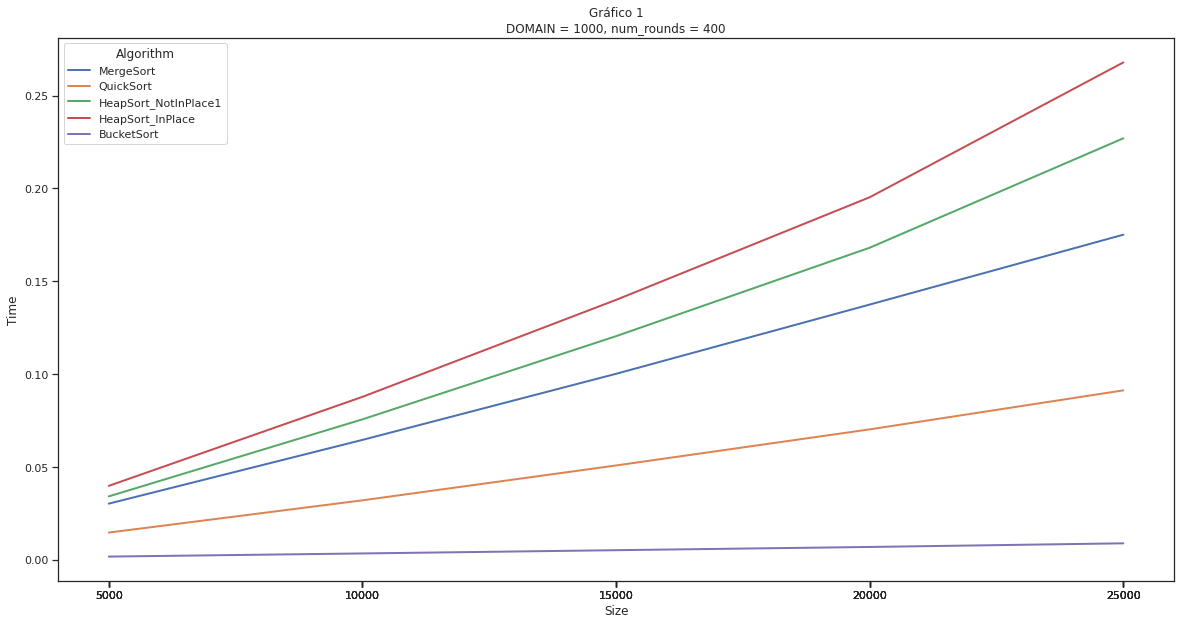

In [52]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

##Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

##Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

g = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)
#g.set_yscale('log')
#fig = plt.figure()
plt.title("Gráfico 1\nDOMAIN = 1000, num_rounds = 400")
g.set(xticks=[i for i in df.Size])
plt.show()

Segundo teste:

In [44]:
import pandas as pd
df = pd.DataFrame.from_dict(mapSizeToTime, orient='index',columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
MergeSort##5000,0.030329,MergeSort,5000
QuickSort##5000,0.014946,QuickSort,5000
HeapSort_NotInPlace##5000,0.003248,HeapSort_NotInPlace,5000
HeapSort_InPlace##5000,0.040012,HeapSort_InPlace,5000
BucketSort##5000,0.001777,BucketSort,5000
MergeSort##10000,0.064743,MergeSort,10000
QuickSort##10000,0.032503,QuickSort,10000
HeapSort_NotInPlace##10000,0.006896,HeapSort_NotInPlace,10000
HeapSort_InPlace##10000,0.088928,HeapSort_InPlace,10000
BucketSort##10000,0.003519,BucketSort,10000


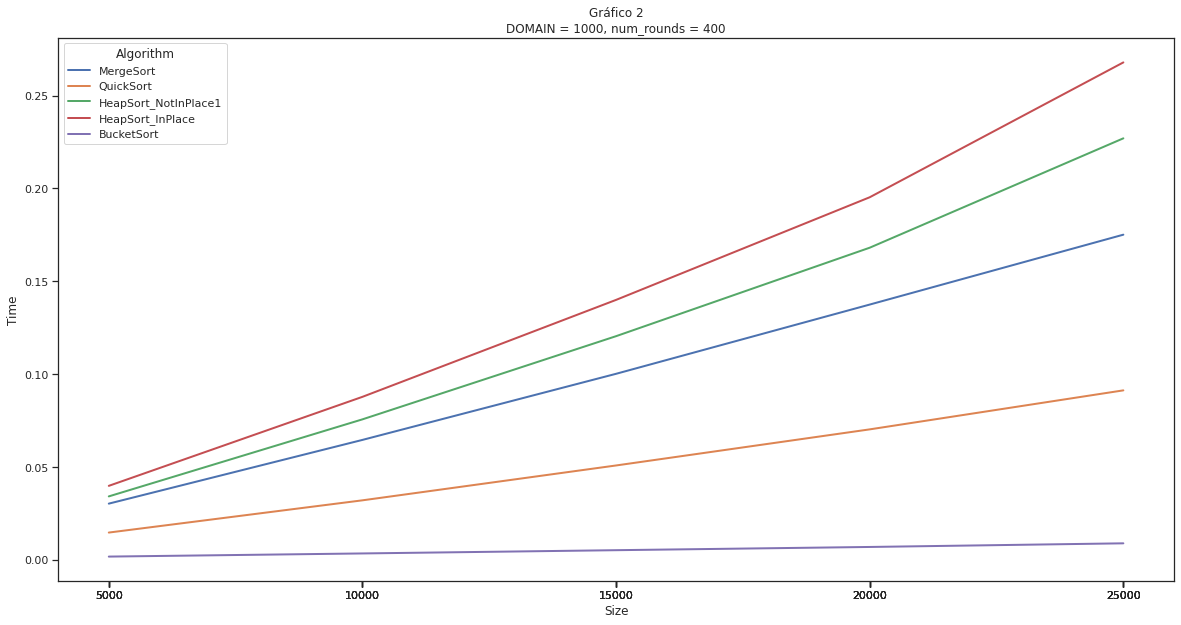

In [53]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

##Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

##Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

g = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)
#g.set_yscale('log')
#fig = plt.figure()
plt.title("Gráfico 2\nDOMAIN = 1000, num_rounds = 400")
g.set(xticks=[i for i in df.Size])
plt.show()